<a href="https://colab.research.google.com/github/realLiuYiwei/ML_learning/blob/main/Try_Implementing_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
corpus_raw = 'He is the king . The king is royal . She is the royal  queen '
# convert to lower case
corpus_raw = corpus_raw.lower()

In [ ]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)
words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words
for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

In [ ]:
print(word2int)
print(int2word)

{'king': 0, 'he': 1, 'the': 2, 'queen': 3, 'she': 4, 'royal': 5, 'is': 6}
{0: 'king', 1: 'he', 2: 'the', 3: 'queen', 4: 'she', 5: 'royal', 6: 'is'}


In [ ]:
# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

In [ ]:
print(sentences)

[['he', 'is', 'the', 'king'], ['the', 'king', 'is', 'royal'], ['she', 'is', 'the', 'royal', 'queen']]


In [ ]:
data = []
WINDOW_SIZE = 2
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1]: 
            if nb_word != word:
                data.append([word, nb_word])

In [ ]:
print(data)

[['he', 'is'], ['he', 'the'], ['is', 'he'], ['is', 'the'], ['is', 'king'], ['the', 'he'], ['the', 'is'], ['the', 'king'], ['king', 'is'], ['king', 'the'], ['the', 'king'], ['the', 'is'], ['king', 'the'], ['king', 'is'], ['king', 'royal'], ['is', 'the'], ['is', 'king'], ['is', 'royal'], ['royal', 'king'], ['royal', 'is'], ['she', 'is'], ['she', 'the'], ['is', 'she'], ['is', 'the'], ['is', 'royal'], ['the', 'she'], ['the', 'is'], ['the', 'royal'], ['the', 'queen'], ['royal', 'is'], ['royal', 'the'], ['royal', 'queen'], ['queen', 'the'], ['queen', 'royal']]


In [ ]:
# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp
x_train = [] # input word
y_train = [] # output word
for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))
# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# Making the tensorflow model

In [ ]:
# making placeholders for x_train and y_train
tf.compat.v1.disable_eager_execution()
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

We take our training data and convert into the embedded representation

In [ ]:
EMBEDDING_DIM = 5
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM]))     #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

Next, we take what we have in the embedded dimension and make a prediction about the neighbour. To make the prediction we use softmax

In [ ]:
print(hidden_representation)

Tensor("Add_12:0", shape=(None, 5), dtype=float32)


In [ ]:
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))

prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_representation, W2), b2))

In [ ]:
sess = tf.Session()
init = tf.global_variables_initializer()

sess.run(init) # must do this

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

#define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 10000

#train for n_iter iterations

for _ in range(n_iters):
  sess.run(train_step, feed_dict={x: x_train, y_label: y_train})


In [ ]:
print(sess.run(W1))
print('----------')
print(sess.run(b1))
print('----------')

[[-2.1272097   0.3586792  -0.9803731   0.2708516  -0.6239545 ]
 [-0.5522463   0.6938541  -0.24835221 -0.5188872  -1.5383853 ]
 [ 1.9780777  -0.90808475 -1.092655   -0.04184348  1.1801578 ]
 [-2.2413158   0.86413836  0.3117944  -1.443656    2.0441027 ]
 [ 0.3510447  -0.55387187 -0.772945   -0.7994312  -0.80496186]
 [-0.46319884 -0.46611163 -1.3791208   2.6543853  -0.5446122 ]
 [-0.36220688 -2.0924256   0.38797283  1.1197618   2.7599006 ]]
----------
[ 0.20014861  0.50772685 -1.2425529  -0.8216071  -0.52395654]
----------


In [ ]:
vectors = sess.run(W1 + b1)

# if you work it out, you will see that it has the same effect as running the node hidden representation
print(vectors)

[[-1.9270611   0.8664061  -2.222926   -0.5507555  -1.1479111 ]
 [-0.35209766  1.201581   -1.490905   -1.3404944  -2.0623417 ]
 [ 2.1782262  -0.4003579  -2.335208   -0.8634506   0.65620124]
 [-2.0411673   1.3718653  -0.9307585  -2.265263    1.5201461 ]
 [ 0.55119336 -0.04614502 -2.015498   -1.6210383  -1.3289185 ]
 [-0.26305023  0.04161522 -2.6216736   1.8327782  -1.0685687 ]
 [-0.16205826 -1.5846987  -0.85458004  0.2981547   2.235944  ]]


In [ ]:
print(vectors[ word2int['queen'] ])

[-2.0411673  1.3718653 -0.9307585 -2.265263   1.5201461]


In [ ]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index

In [ ]:
print(int2word[find_closest(word2int['king'], vectors)])
print(int2word[find_closest(word2int['queen'], vectors)])
print(int2word[find_closest(word2int['royal'], vectors)])


he
king
king


In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors = normalizer.fit_transform(vectors,'l2')

king 0.89717036
he 0.25030422
the 0.9601968
queen 0.50680053
she -0.9047838
royal 0.9838481
is -0.40288413


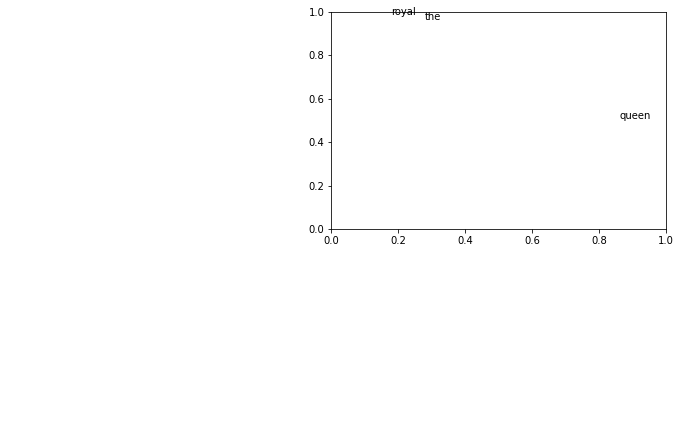

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (vectors[word2int[word]][0],vectors[word2int[word]][1] ))
plt.show()